In [8]:
import pickle

In [10]:
X1_train_scaled = pickle.load(open('X1trainscaled.pkl','rb'))

In [12]:
X1_test_scaled = pickle.load(open('X1testscaled.pkl','rb'))

In [14]:
X2_train_scaled = pickle.load(open('X2trainscaled.pkl','rb'))

In [16]:
X2_test_scaled = pickle.load(open('X2testscaled.pkl','rb'))

In [18]:
y1_train = pickle.load(open('homegoalstrain.pkl','rb'))

In [20]:
y1_test = pickle.load(open('homegoalstest.pkl','rb'))

In [22]:
y2_train = pickle.load(open('awaysgoalstrain','rb'))

In [24]:
y2_test = pickle.load(open('awaygoalstest.pkl','rb'))

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## FOR HOME TEAM GOALS

In [31]:
rfr = RandomForestRegressor(n_estimators=100,min_samples_split = 10, min_samples_leaf=1, max_depth=20)

rfr.fit(X1_train_scaled,y1_train)

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [33]:
y_pred = rfr.predict(X1_test_scaled)

In [35]:
# R² Score
r2 = r2_score(y1_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y1_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y1_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y1_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.4f}")


R² Score: -1.3142
Mean Absolute Error: 0.7616
Mean Squared Error: 0.8798
Root Mean Squared Error: 0.9380


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/var/folders/y8/jpm7v1h57rz9_7mxcqc6xg7m0000gn/T/ipykernel_11261/2162512200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X1_train_scaled.columns, palette="viridis")


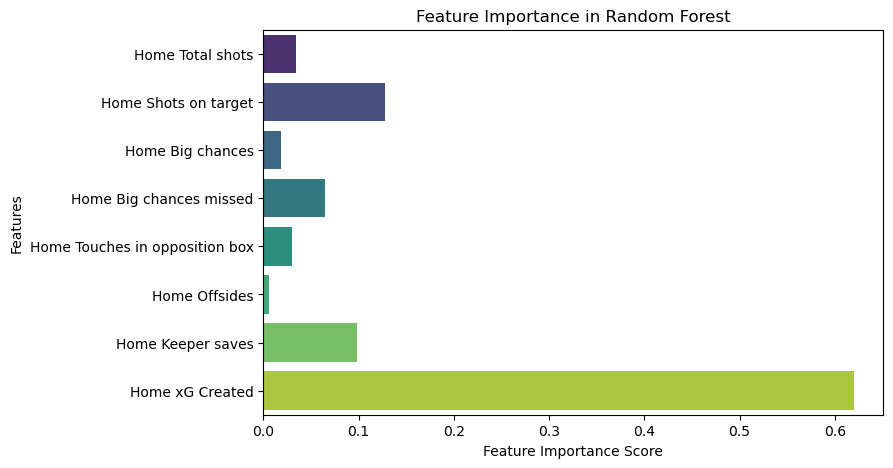

In [37]:
feature_importance = rfr.feature_importances_

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=X1_train_scaled.columns, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run Randomized Search
rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2)
rf_random.fit(X1_train_scaled, y1_train)

# Print best parameters
print("Best Hyperparameters:", rf_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30}


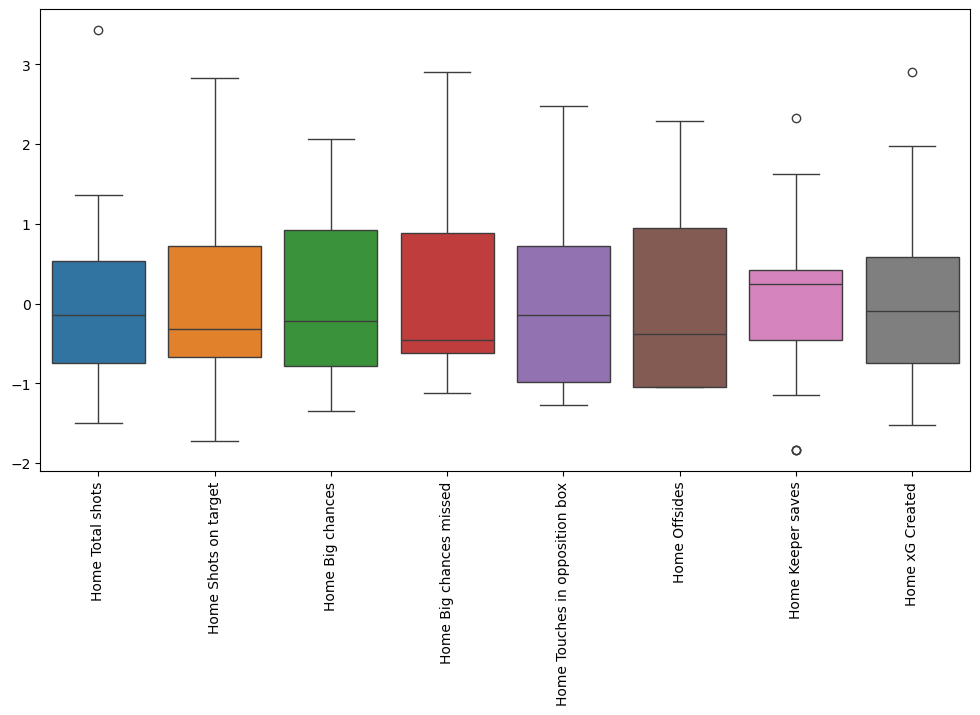

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X1_train_scaled)
plt.xticks(rotation=90)
plt.show()

In [43]:
import pandas as pd

# Select the feature
feature = "Home xG Created"

# Calculate Q1, Q3, and IQR
Q1 = X1_train_scaled[feature].quantile(0.25)
Q3 = X1_train_scaled[feature].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = X1_train_scaled[(X1_train_scaled[feature] < lower_bound) | (X1_train_scaled[feature] > upper_bound)]
print(outliers)


   Home Total shots  Home Shots on target  Home Big chances  \
7          3.428736              2.825193          1.494671   

   Home Big chances missed  Home Touches in opposition box  Home Offsides  \
7                 0.889407                        2.475291        0.95119   

   Home Keeper saves  Home xG Created  
7           -1.83855         2.908676  


In [58]:
X1_train_scaled.drop(['Home Total shots','Home Big chances','Home Big chances missed','Home Touches in opposition box','Home Offsides'], axis=1, inplace=True)

In [60]:
X1_train_scaled

,Home Shots on target,Home xG Created
0,-0.323629,0.092335
1,-0.673498,-0.821154
2,-1.023367,-1.130709
3,0.026240,0.951198
4,1.425717,1.406425
5,1.075847,0.681096
6,-1.373236,-1.415985
7,2.825193,2.908676
8,0.725978,-0.062442
9,-0.323629,-0.068512


In [64]:
X1_test_scaled.drop(['Home Total shots','Home Big chances','Home Big chances missed','Home Touches in opposition box','Home Offsides'], axis=1, inplace=True)

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
gb_reg = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, subsample=0.8)

In [82]:
gb_reg.fit(X1_train_scaled,y1_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=4,
                          min_samples_split=10, subsample=0.8)

In [84]:
y_pred = gb_reg.predict(X1_test_scaled)

In [86]:
mse = mean_squared_error(y1_test, y_pred)
mae = mean_absolute_error(y1_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.7652688066484028
Mean Absolute Error: 0.7271047543991339


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Step size at each iteration
    'max_depth': [3, 4, 5],                 # Maximum depth of the trees
    'subsample': [0.8, 0.9, 1.0],           # Fraction of samples used for fitting
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model to find the best hyperparameters
grid_search.fit(X1_train_scaled, y1_train)

# Print the best hyperparameters and the corresponding score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score (MSE): {grid_search.best_score_}")

# Use the best model to make predictions
best_gb_regressor = grid_search.best_estimator_
y_pred = best_gb_regressor.predict(X1_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y1_test, y_pred)
mae = mean_absolute_error(y1_test, y_pred)

print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best Score (MSE): -0.8971620780150673
Test Mean Squared Error: 0.7533719590821782
Test Mean Absolute Error: 0.7254744340410115


In [89]:
print(r2_score(y1_test,y_pred))

-0.9816958054118163


In [92]:
importances = best_gb_regressor.feature_importances_
print(importances)

[0.13824717 0.86175283]


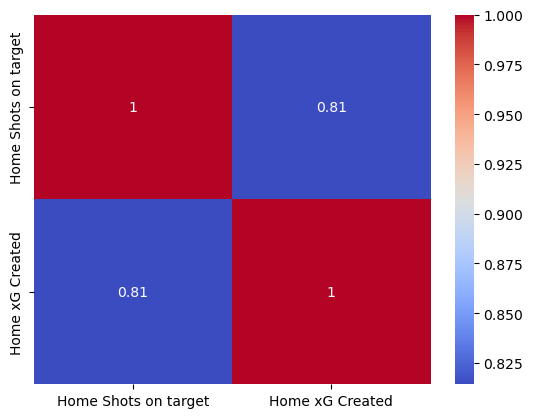

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
corr = X1_train_scaled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poly = PolynomialFeatures(degree=2)
X1_train_scaled = poly.fit_transform(X1_train_scaled)
X1_test_scaled = poly.fit_transform(X1_test_scaled)

In [118]:
gb_reg.fit(X1_train_scaled,y1_train)
y_pred = gb_reg.predict(X1_test_scaled)

In [120]:
print(r2_score(y1_test,y_pred))

-0.7371243170498838


## TRYING XGBOOST

In [125]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [127]:
import xgboost as xgb

In [133]:
# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,   # Number of trees
    learning_rate=0.01,  # Step size shrinkage
    max_depth=3,        # Tree depth (prevents overfitting)
    subsample=0.6,      # Use 80% of data for training each tree
    colsample_bytree=1.0, # Use 80% of features for each tree
    random_state=42
)

# Train the model
xgb_model.fit(X1_train_scaled, y1_train)

# Predictions
y_pred_xgb = xgb_model.predict(X1_test_scaled)

# Evaluate model
r2_xgb = r2_score(y1_test, y_pred_xgb)
print(f"XGBoost R² Score: {r2_xgb:.4f}")


XGBoost R² Score: -0.6326
